## Program

In [3]:
from pyquil import Program
from pyquil.gates import *
program = Program(
    H(0),
    CNOT(0, 1),
)
print(program)

H 0
CNOT 0 1



## Wavefunction

In [4]:
from pyquil.api import WavefunctionSimulator
wfn = WavefunctionSimulator().wavefunction(program)
print(wfn)

(0.7071067812+0j)|00> + (0.7071067812+0j)|11>


## Expectation

In [5]:
from pyquil.paulis import sZ

z0 = (1-sZ(0))*0.5
z1 = (1-sZ(1))*0.5
xor = (1-sZ(0)*sZ(1))*0.5

In [6]:
for observable in [z0, z1, xor]:
    expectation = WavefunctionSimulator().expectation(prep_prog=program, pauli_terms=observable)
    print(observable, '\t', expectation)

(0.5+0j)*I + (-0.5+0j)*Z0 	 (0.5+0j)
(0.5+0j)*I + (-0.5+0j)*Z1 	 (0.5+0j)
(0.5+0j)*I + (-0.5+0j)*Z0*Z1 	 0j


## Batch Jobs

In [8]:
import numpy as np
from pyquil.api import QVMConnection
cxn = QVMConnection()
thetas = np.linspace(0, np.pi, 20)
bitstrings = [np.asarray(cxn.run_and_measure(Program(RY(theta, 0)), qubits=[0], trials=1000))
              for theta in thetas]

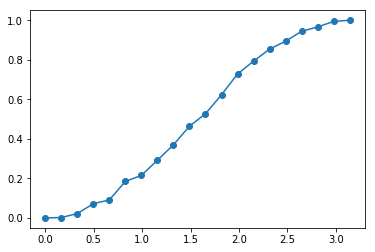

In [9]:
%matplotlib inline
from matplotlib import pyplot as plt

averages = [np.mean(bs[:,0]) for bs in bitstrings]
_ = plt.plot(thetas, averages, 'o-')